Вручную найденный фрагмент с хорошим качеством

- `data/freq_11-09-2023_13h-05m.log`: 11-я последовательность

In [1]:
%load_ext autoreload
%autoreload 2


In [17]:
import numpy as np
from matplotlib import pyplot as plt

from load_serie import load_serie
from denoize import create_denoized_spline, build_box_plot
from shot_detector import detect_shots


In [47]:
file = 'data/freq_11-09-2023_13h-05m.log'
serie_n = 16

serie = load_serie(file, serie_n)

dns, ss = create_denoized_spline(serie, 0.5)


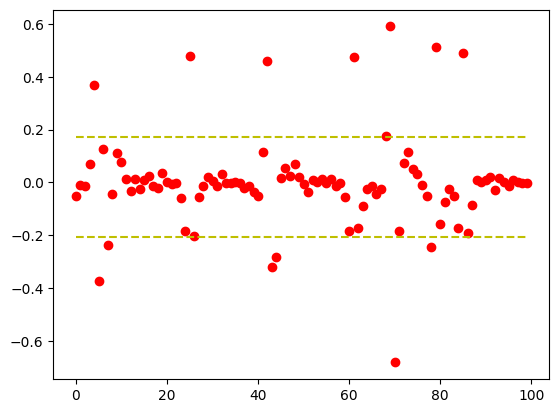

In [56]:
x = np.linspace(0, len(serie) - 1, len(serie))
smoothed_serie = [ss(x) for x in x]
error = [serie[i] - smoothed_serie[i] for i in range(len(serie))]
bp = build_box_plot(error)

plt.plot(x, error, 'ro',
         [bp['lower_bound']] * len(x), 'y--',
         [bp['upper_bound']] * len(x), 'y--')

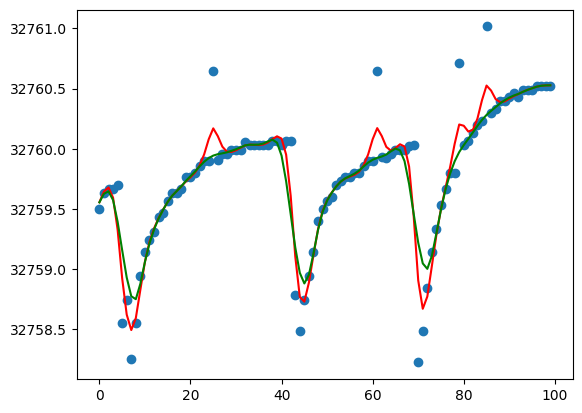

In [54]:
filtred_serie = [dns(x) for x in x]

plt.plot(serie, marker='o', linestyle='None')
plt.plot(smoothed_serie, color='red')
plt.plot(filtred_serie, color='green')


`csaps.ISmoothingSpline.__call__(x, p)` - `p` - порядок производной

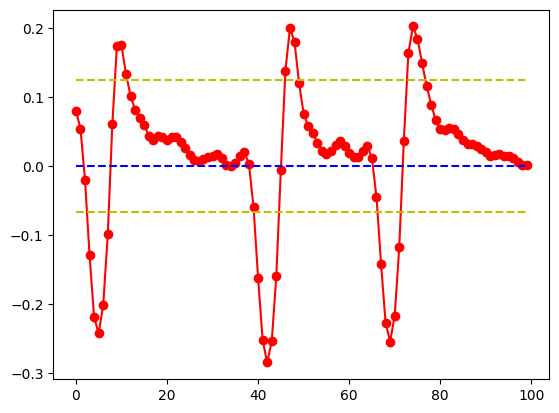

In [50]:
derivate_serie = [dns(x, 1) for x in x]
derivatire2_bxplt = build_box_plot(derivate_serie)

plt.plot(derivate_serie, 'ro-',
         [derivatire2_bxplt['lower_bound']] * len(derivate_serie), 'y--',
         [derivatire2_bxplt['upper_bound']] * len(derivate_serie), 'y--',
         [0] * len(derivate_serie), 'b--')


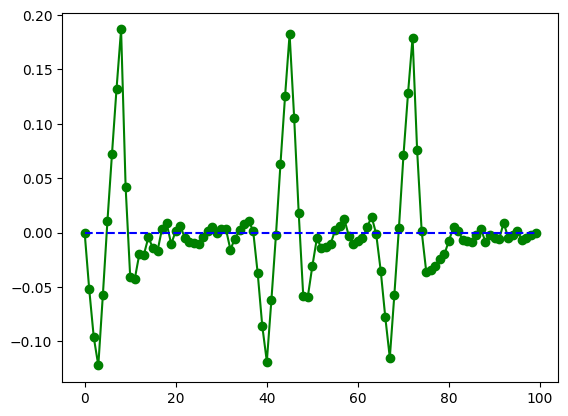

In [58]:
derivate2_serie = [dns(x, 2) for x in x]

plt.plot(derivate2_serie, 'go-',
         [0] * len(derivate_serie), 'b--')